In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler

from create_architecture import make_dense_model

In [6]:
# Load in data that we will use
data_path = "../data/"
X = np.load(data_path + "double_mean_lg5_X.npy")
Y = np.load(data_path + "double_mean_lg5_Y.npy")

# Split and scale the data
train_pct, test_pct, val_pct = 0.6, 0.2, 0.2

X_train = X[:int(train_pct*X.shape[0])]
X_test = X[int(train_pct*X.shape[0]):int((train_pct+test_pct)*X.shape[0])]
X_val = X[-int(val_pct*X.shape[0]):]

Y_train = Y[:int(train_pct*X.shape[0])]
Y_test = Y[int(train_pct*X.shape[0]):int((train_pct+test_pct)*X.shape[0])]
Y_val = Y[-int(val_pct*X.shape[0]):]

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Store exploration notes here:
Hidden layer sizes to test (input=50):
- [10]
- [20]
- [20, 5]
- [10, 5]
- [20, 10, 5]

Regularizations to test:
- None
- Default l1
- Default l2
- Default l1_l2

Should include a flag if any given model does very poorly on its own, and exclude it from the average. Should also check to make sure not too many models are being excluded for a certain configuration. 

Epoch 1/300
152/152 [==============================] - 1s 4ms/step - loss: 0.8081 - accuracy: 0.4822 - val_loss: 0.7633 - val_accuracy: 0.4986
Epoch 2/300
152/152 [==============================] - 0s 3ms/step - loss: 0.7569 - accuracy: 0.4982 - val_loss: 0.7331 - val_accuracy: 0.5166
Epoch 3/300
152/152 [==============================] - 0s 3ms/step - loss: 0.7340 - accuracy: 0.5092 - val_loss: 0.7184 - val_accuracy: 0.5311
Epoch 4/300
152/152 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.5186 - val_loss: 0.7094 - val_accuracy: 0.5323
Epoch 5/300
152/152 [==============================] - 0s 3ms/step - loss: 0.7121 - accuracy: 0.5277 - val_loss: 0.7036 - val_accuracy: 0.5308
Epoch 6/300
152/152 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.5319 - val_loss: 0.6995 - val_accuracy: 0.5323
Epoch 7/300
152/152 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5354 - val_loss: 0.6964 - val_accuracy: 0.5314

Epoch 58/300
152/152 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5709 - val_loss: 0.6825 - val_accuracy: 0.5605
Epoch 59/300
152/152 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5711 - val_loss: 0.6825 - val_accuracy: 0.5605
Epoch 60/300
152/152 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5710 - val_loss: 0.6825 - val_accuracy: 0.5608
Epoch 61/300
152/152 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5717 - val_loss: 0.6824 - val_accuracy: 0.5611
Epoch 62/300
152/152 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5726 - val_loss: 0.6824 - val_accuracy: 0.5611
Epoch 63/300
152/152 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5716 - val_loss: 0.6825 - val_accuracy: 0.5602
Epoch 64/300
152/152 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5727 - val_loss: 0.6825 - val_accuracy:

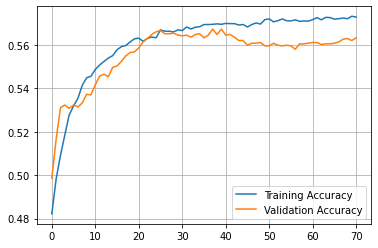

In [36]:
hidden_layer_sizes = [3]
regularization = None
# regularization = tf.keras.regularizers.L1(0.01) # default
# regularization = tf.keras.regularizers.L2(0.01) # default
# regularization = tf.keras.regularizers.L1L2(l1=0.01, l2=0.01) # default
# Testing that these timing parameters work for different models
learning_rate = 2e-4
epochs = 300

# Make a model
model = make_dense_model(input_size=X.shape[1], 
                         hidden_layer_sizes=hidden_layer_sizes, 
                         regularization=regularization, activation="relu")

# Compile the model
loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
metrics = ['accuracy']
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# Fit the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1)]

history = model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), 
                    batch_size=64, epochs=epochs, callbacks=callbacks, verbose=1)

plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

In [37]:
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 51)]              0         
                                                                 
 dense_40 (Dense)            (None, 3)                 156       
                                                                 
 dense_41 (Dense)            (None, 1)                 4         
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [39]:
str(tf.keras.regularizers.L1L2(l1=0.01, l2=0.01))

'<keras.regularizers.L1L2 object at 0x7f20d82a7670>'